In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
X_train_flattened = X_train / 255
X_test_flattened = X_test / 255

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train_flattened = X_train_flattened.reshape(-1,28,28,1)
X_test_flattened = X_test_flattened.reshape(-1,28,28,1)

In [8]:
X_train[0].shape

(28, 28, 1)

In [9]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [12]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

<h1> First we fit the unflattened data into our model and check the accuracy </h1>

In [17]:
h = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0322 - accuracy: 0.9901


In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0735 - accuracy: 0.9830


[0.07348974049091339, 0.9829999804496765]

<b> We get 98% accuracy on our test dataset without normalizing our data </b>

In [22]:
y_predicted = model.predict(X_test)

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    0,    1,    0,    2,    2,    0,    3],
       [   3, 1119,    1,    3,    1,    2,    3,    3,    0,    0],
       [   0,    1, 1016,    1,    1,    0,    2,   11,    0,    0],
       [   0,    0,    4, 1001,    0,    1,    0,    4,    0,    0],
       [   1,    0,    0,    0,  968,    0,    3,    1,    2,    7],
       [   1,    0,    1,   11,    0,  867,    6,    3,    1,    2],
       [   5,    3,    1,    0,    2,    1,  944,    0,    2,    0],
       [   0,    4,    7,    1,    0,    0,    0, 1016,    0,    0],
       [   2,    1,    2,    2,    5,    1,    0,    4,  950,    7],
       [   1,    1,    0,    1,    7,    4,    0,   13,    3,  979]],
      dtype=int32)>

<b> Now we summarize our models performance</b>

Text(69.0, 0.5, 'Truth')

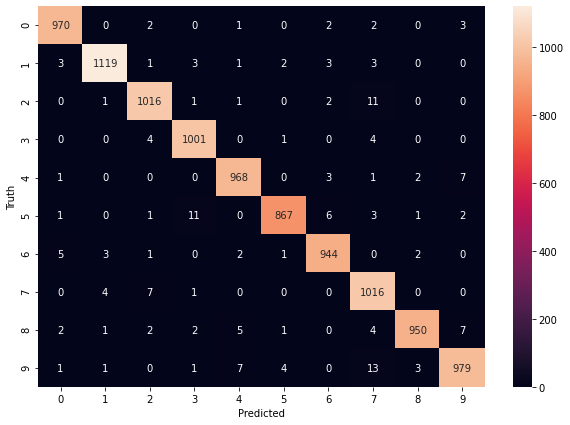

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**All predictions**

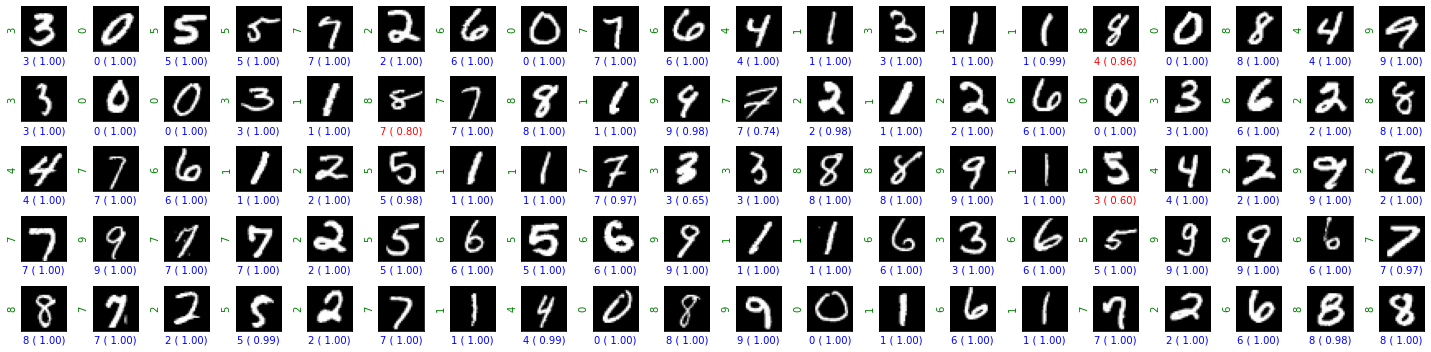

In [28]:
import random
ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = y_test[random_indices]
y_predicted = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(y_predicted[i]) 
        confidence = y_predicted[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

<h1> Now we fit the normalized dataset into out model </h1>

In [32]:
h = model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2911 - accuracy: 0.9052
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0786 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0555 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0425 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0343 - accuracy: 0.9894


In [33]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0595 - accuracy: 0.9825


[0.059507593512535095, 0.9825000166893005]

**Surprisingly we got a slightly less test accuracy after normalizing the data!**

In [34]:
y_predicted = model.predict(X_test_flattened)

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [36]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

**let's visualize the performance for this one**

Text(69.0, 0.5, 'Truth')

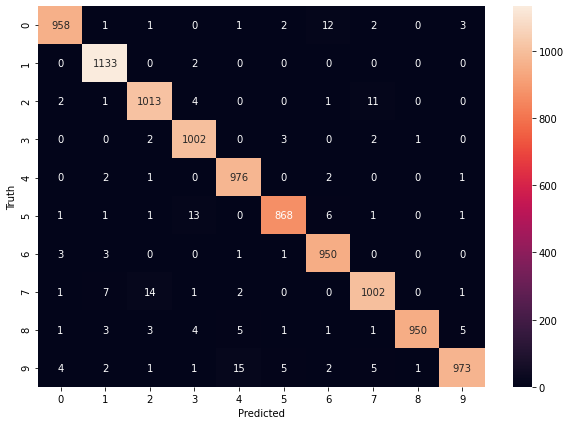

In [37]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**All predictions**

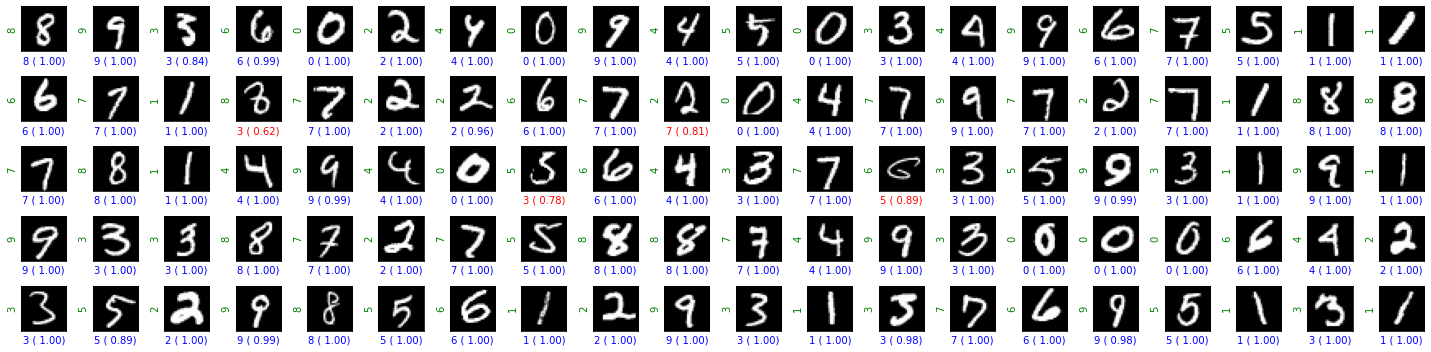

In [38]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test_flattened.shape[0]), ROWS*COLS)
sample_images = X_test_flattened[random_indices, :]
sample_labels = y_test[random_indices]
y_predicted = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(y_predicted[i]) 
        confidence = y_predicted[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

<b>Now we use different Optimizers called SGD and RMSprop 

In [39]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [40]:
h = model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0139 - accuracy: 0.9962
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0129 - accuracy: 0.9965
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0120 - accuracy: 0.9968
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0112 - accuracy: 0.9968


In [41]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0457 - accuracy: 0.9878


[0.04565402492880821, 0.9878000020980835]

In [42]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [49]:
h = model.fit(x=X_train_flattened, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 7s 10ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0174 - val_accuracy: 0.9944
Epoch 2/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0121 - val_accuracy: 0.9968
Epoch 3/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0141 - val_accuracy: 0.9967
Epoch 4/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0318 - val_accuracy: 0.9914
Epoch 5/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0221 - val_accuracy: 0.9951


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0790 - accuracy: 0.9863


[0.07897907495498657, 0.986299991607666]

**We visualize the results using RMSprop**

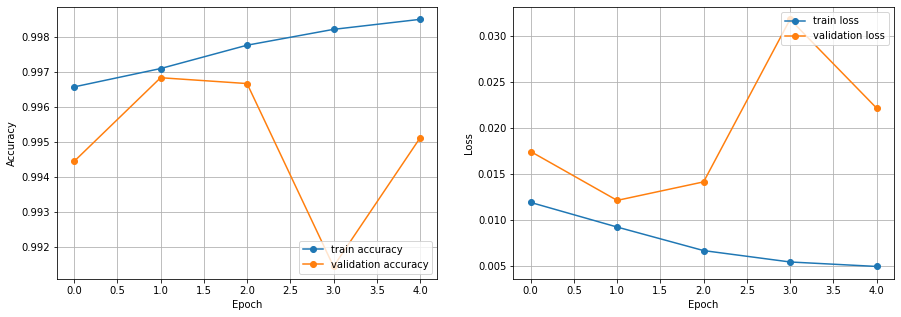

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

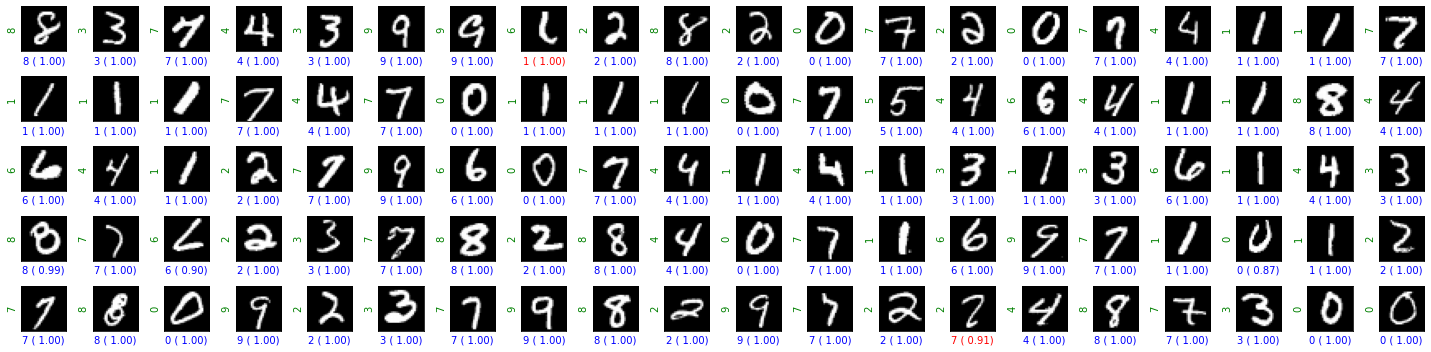

In [51]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test_flattened.shape[0]), ROWS*COLS)
sample_images = X_test_flattened[random_indices, :]
sample_labels = y_test[random_indices]
y_predicted = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(y_predicted[i]) 
        confidence = y_predicted[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

<b>conclusion : </b> Both of them got slightly better test accuracy than adam, SGD got 98.78% accuracy and RMSprop got 98.63% accuracy where adam has 98.25% accuracy. And considering no of epochs, SGD and RMSprop got a very good accuracy within the first epoch. 